In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import os

In [3]:
path = os.getcwd() + '/ex1/ex1data2.txt'

In [4]:
# load data (csv) into a data frame, an object
data = pd.read_csv(path, header=None, names=['Size', 'Bedroom', 'Price'])
data.head() # view first n entries, default 5
# data.tail()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
data.describe() # calculates stats

,Size,Bedroom,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [6]:
data = (data-data.mean()) / data.std()
data.head()

,Size,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


implement linear regression model on the data
does not have to change anything from ex1data1, as both algorithms uses linear algebra, able to handle data of any dimensions

In [7]:
# define squared error cost function
def compute_cost(X, y, theta):
    predicted_y = X * theta # compute predicted y using linear algebra
    error = predicted_y - y
#     squared_error = np.power(error, 2)
    squared_error = error.T * error
#     sum_squared_error = np.sum(squared_error)
    squared_error_cost = squared_error / (2 * X.shape[0])
    return np.sum(squared_error_cost) # convert to raw value instead of matrix

In [8]:
# manipulate data from pandas data frame into X, y and theta
# store all data as matrix of m x n
# not array, tho array is easier to manipulate using multiplication

data.insert(0, 'x0', 1) # insert feature 0

# slice the data to get design matrix
X = data.iloc[:,:-1] # set X to be the first to second last columns
y = data.iloc[:,-1:] # set y to be the last column
theta = np.mat(np.zeros((X.shape[1], 1)))
# initialise empty theta, using np.array for decimal points
# if used np.array[0,0], then cells are initialised  as int
# alt method use np.zeros
# uses (X.shape[1],1) to auto assign the dimension of theta
# results in 2*1 matrix

X, y = np.mat(X.values), np.mat(y.values) # convert to matrix

In [9]:
# test compute_cost function and variables are initialised properly
# answer should be 32.072733877455676
compute_cost(X, y, theta)

0.48936170212765967

In [10]:
# define gradient desecnt function (vectorized version of above)
def gradient_descent(X, y, theta, alpha, iters):
    cost = np.zeros(iters) # create an array for storing history of costs after each iteration
    
    for i in range(iters):
        # error = (X * theta) - y
        # gradient = X.T * error # transpose X features, to solve for matrix vector product, X is 100 * n, error is 100*1 
        # increment = alpha / X.shape[0] * gradient
        # theta = theta-increment
        theta = theta - alpha / X.shape[0] * (X.T * ((X * theta) - y))
        cost[i] = compute_cost(X, y, theta)
    return theta, cost

In [11]:
# initialise variables for learning rate and itertations
alpha = 0.01
iters = 1000
theta = np.mat(np.zeros((X.shape[1], 1)))

# perform gradient descent
theta_best, cost = gradient_descent(X, y, theta, alpha, iters)
theta_best

matrix([[-1.10786085e-16],
        [ 8.78503652e-01],
        [-4.69166570e-02]])

In [12]:
compute_cost(X, y, theta_best)

0.13070336960771892

Plotting graphs

In [13]:
# x = np.linspace(data.Population.min(), data.Population.max(), 100) # create an array of evenly space values, used as x
# y_predicted = theta_best[0,0] + theta_best[1,0]*x # calculate predicted y from theta
# fig, ax = plt.subplots(figsize=(12,8)) # create fig and axes objects
# ax.plot(x, y_predicted, 'r', label='Prediction') # plot x, y and 'r' red line, assign label
# ax.scatter(data.Population, data.Profit, label='Training Data') # overlay training data as scatter plot
# ax.legend(loc=0)
# ax.set_xlabel('Population')  
# ax.set_ylabel('Profit')  
# ax.set_title('Predicted Profit vs. Population Size')

(0.13070336960771892, 0.4805491041076718)

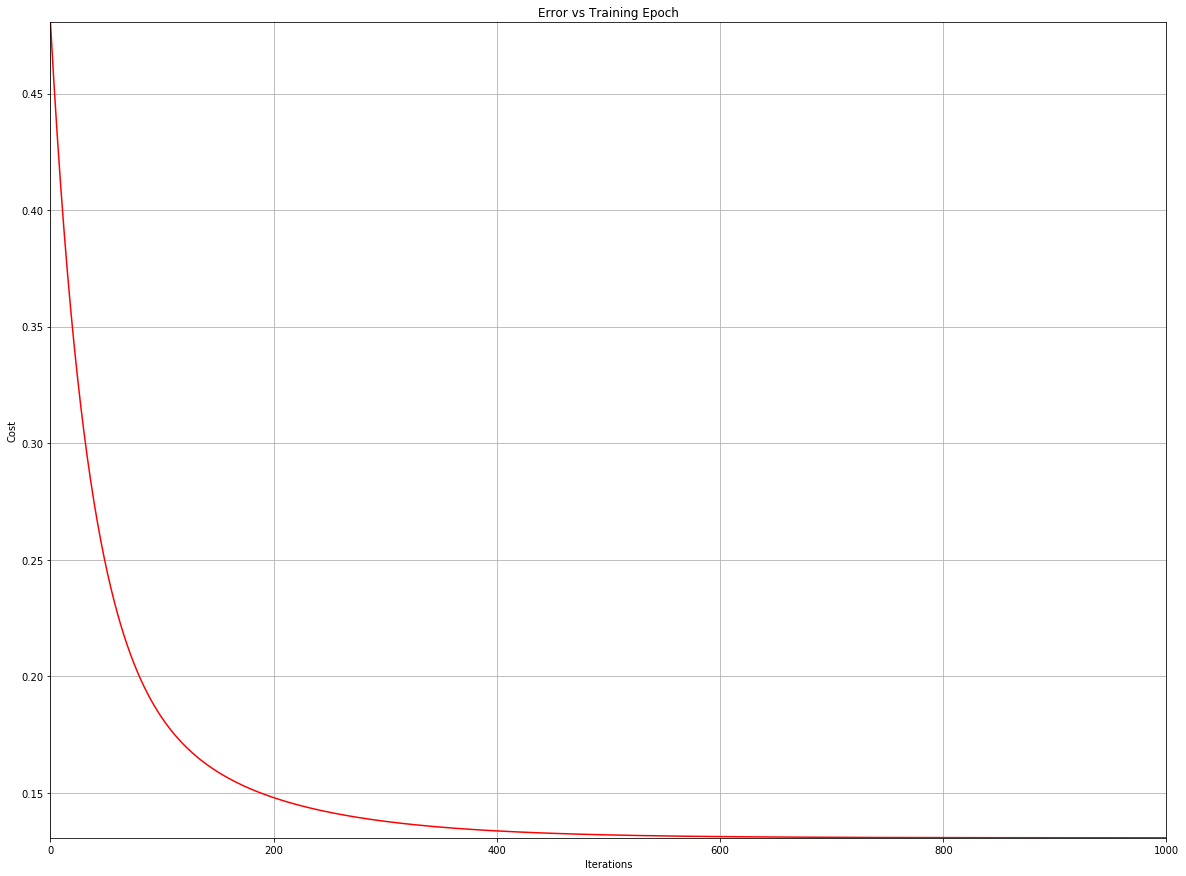

In [14]:
fig, ax = plt.subplots(figsize=(20,15))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')
ax.grid(True)
ax.set_xlim(0, iters)
ax.set_ylim(cost[iters-1], cost[0])

Normal equation method

In [15]:
from scipy import linalg
theta_best = np.linalg.pinv(X.T*X)*X.T*y
theta_best

matrix([[ 1.04083409e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

In [16]:
compute_cost(X, y, theta_best)

0.130686480539042